In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import scipy.ndimage.filters as filters
import numpy as np
from scipy import signal
import scipy.ndimage as ndimage

In [2]:
def high_pass_filter_green(img):
    highpass_filter = np.array([[-1/9, -1/9, -1/9],
                   [-1/9, 8/9, -1/9],
                   [-1/9, -1/9, -1/9]])

    return signal.convolve(img[:,:, 1], highpass_filter)

def high_pass_filter_red(img):
    highpass_filter = np.array([[-1/9, -1/9, -1/9],
                   [-1/9, 8/9, -1/9],
                   [-1/9, -1/9, -1/9]])

    return signal.convolve(img[:,:, 0], highpass_filter)

In [3]:
def recognize_traffic_light(img):
    
    neighborhood_size = 75
    threshold = 0.25

    data_max = filters.maximum_filter(img, neighborhood_size)
    maxima = (img == data_max)
    data_min = filters.minimum_filter(img, neighborhood_size)

    diff = ((data_max - data_min) >= threshold)
    maxima[diff == 0] = 0

    labeled, num_objects = ndimage.label(maxima)
    slices = ndimage.find_objects(labeled)

    x, y = [], []
    for dy, dx in slices:
        if (dx.start > 5 and dx.start < 1995 and dy.start > 5 and dy.start < 995):
            x_center = int((dx.start + dx.stop - 1) / 2)
            x.append(x_center)
            y_center = int((dy.start + dy.stop - 1) / 2)
            y.append(y_center)
    return x, y


In [6]:
def print_picture(path_img):

    picture = np.array(Image.open(path_img)).astype(float) / 255

    highpass_filter_green = high_pass_filter_green(picture)
    highpass_filter_red = high_pass_filter_red(picture)

    x_green, y_green = recognize_traffic_light(highpass_filter_green)

    x_red, y_red = recognize_traffic_light(highpass_filter_red)

    picture2 = np.array(Image.open(path_img))

    x_red_, y_red_ = [], []
    for i in range(len(x_red)):
        if (x_red[i] not in x_green and not y_red[i] in y_green):
            x_red_.append(x_red[i])
            y_red_.append(y_red[i])

    plt.figure()
    plt.imshow(picture)

    cord = zip(x_green, y_green)
    for x, y in cord:
        red_val = picture2[y, x, 0]
        green_val = picture2[y, x, 1]
        if red_val >= green_val:
            plt.plot(x, y, 'r+')
        else:
            plt.plot(x, y, 'g+')

    cord = zip(x_red_, y_red_)
    for x, y in cord:
        red_val = picture2[y, x, 0]
        green_val = picture2[y, x, 1]
        if red_val >= green_val:
            plt.plot(x, y, 'r+')
        else:
            plt.plot(x, y, 'g+')

    plt.show(block=True)

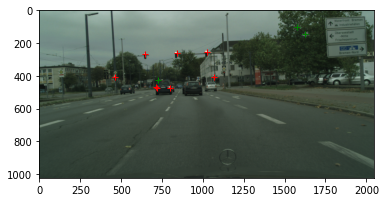

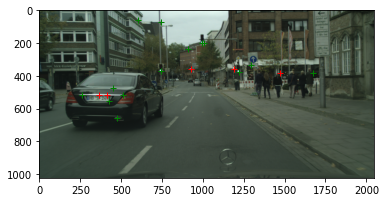

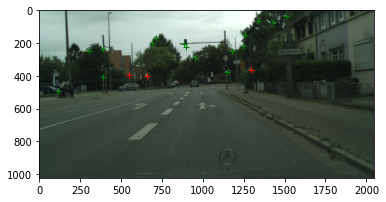

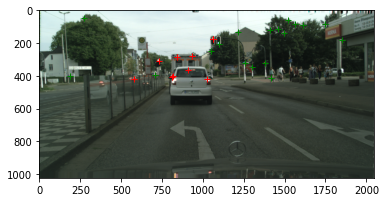

In [7]:
path_img = r'C:\Users\s0573\Documents\bootcamp\mobilye\phase_1_final\image\bremen_000150_000019_leftImg8bit.png'
print_picture(path_img)

path_img = r'C:\Users\s0573\Documents\bootcamp\mobilye\phase_1_final\image\bremen_000256_000019_leftImg8bit.png'
print_picture(path_img)

path_img = r'C:\Users\s0573\Documents\bootcamp\mobilye\phase_1_final\image\bremen_000290_000019_leftImg8bit.png'
print_picture(path_img)

path_img = r'C:\Users\s0573\Documents\bootcamp\mobilye\phase_1_final\image\krefeld_000000_035398_leftImg8bit.png'
print_picture(path_img)

